## **In this code, we are going to explore how to rotate an image.**

First we need to mount our code with google drive.

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import all the package that we will use for the code. We also import the imutils so that we can use the function that we create in that code.

In [0]:
# Import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [0]:
# Construct the argument parser and parse the arguments
args = {
	# Task 2
	"image": '/content/drive/My Drive/Colab Notebooks/Image-Processing/corona.png',
  "image2": '/content/drive/My Drive/Colab Notebooks/Image-Processing/flower.jpg',
	"image3" : '/content/drive/My Drive/Colab Notebooks/Image-Processing/test_image_1.png'
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 1. The cv2.imread function returns a NumPy array representing the image.

Then, displaying the actual image on our screen. The parameter is a reference to the image we loaded before.

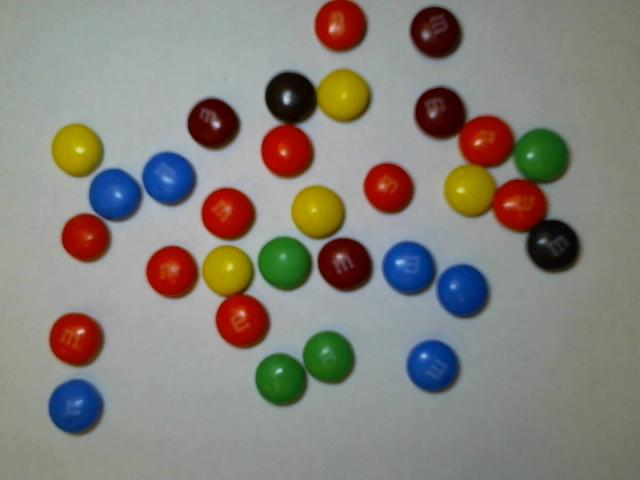

In [9]:
# Load the image and show it here :
image = cv2.imread(args['image3'])
cv2_imshow(image)

Lines 3 and 4 grabs the width and height of the image, then divides each by 2 to determine the center of the image. Integer division is used here, denoted as “//” to ensure we receive whole integer numbers.

In [11]:
# Grab the dimensions of the image and calculate the center
# of the image
(h, w) = image.shape[:2]
# Task 2
# Calculate center here :
center = (h//2, w//2)
print(center)

(240, 320)


Just as we deﬁned a matrix to translate an image, we also deﬁne a matrix to rotate the image. Instead of manually constructing the matrix using NumPy, we’ll just make a call to the cv2.getRotationMatrix2Dmethod on Line 2.

The cv2.getRotationMatrix2D function takes three arguments: the point at which we want to rotate the image around (in this case, the center of the image). We then specify θ, the number of degrees we are going to rotate the image by. In this case, we are going to rotate the image 45 degrees. The last argument is the scale of the image. We haven’t discussed resizing an image yet, but here you can specify a ﬂoating point value, where 1.0 means the same dimensions of the image are used. However, if you speciﬁed a value of 2.0 the image would be doubled in size. Similarly, a value of 0.5 halves the size of the image.

Once we have our rotation matrix M from the cv2.getRot ationMatrix2D function, we can apply the rotation to our image using the cv2.warpAffinemethod on Line 3. The ﬁrst argument to this function is the image we want to rotate. We then specify our rotation matrix M along with the output dimensions (width and height) of our image. Line 4 then shows our image rotated by 45 degrees.

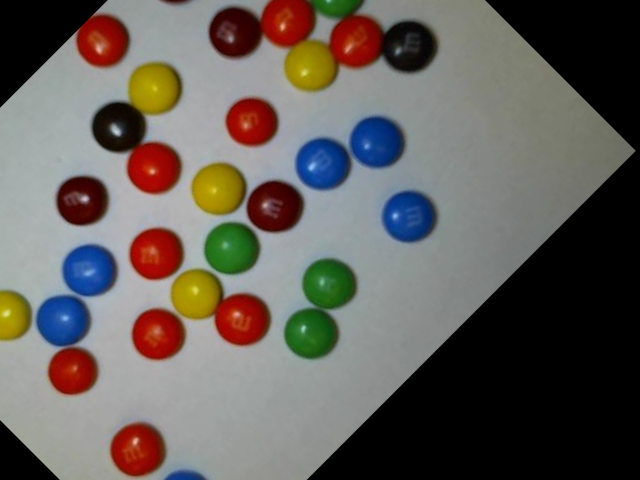

In [12]:
# Task 3
# Rotate our image by 45 degrees
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow(rotated)

On Lines 2-4, we perform another rotation. This time we are rotating by -90 degrees rather than 45.

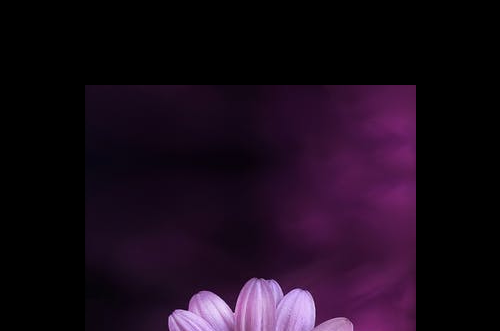

In [0]:
# Task 4
# Rotate our image by -90 degrees
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow(rotated)

Here, we are rotating our image by 180 degrees. The code for our rotate method is much easier to read and maintain than making calls to cv2.getRotationMatrix2D and cv2.warpAffine each time we want to rotate an image.

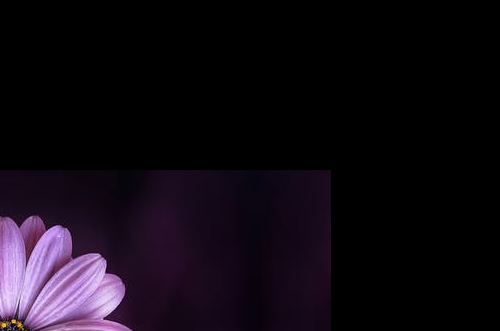

In [0]:
# Task 5
# Use rotate function in imutils.py to rotate the by 180 degrees and show the image
rotated = imutils.rotate(image, 180, center, 1.0)
cv2_imshow(rotated)

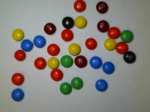

In [13]:
# We need to keep in mind aspect ratio so the image does
# not look skewed or distorted -- therefore, we calculate
# the ratio of the new image to the old image. Let's make
# our new image have a width of 150 pixels
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# Task 3
# Resized the image using opencv function and show the image:
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

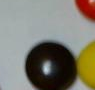

In [14]:
# Crop image using opencv function and show the image
# (start y = 30, ending y = 120, start x = 240, start x = 335)
cropped = image[30:120, 240:335]
cv2_imshow(cropped)